In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Cargamos el Dataset
df = pd.read_csv("C:/Users/braya/OneDrive - Universidad Nacional Abierta y a Distancia/Desktop/UNAD/SEMESTRE 5/ANALISIS DE DATOS/TAREA 3/Anexo 3 - Dataset Heart Disease Cleveland UCI/heart_cleveland_upload.csv")


In [3]:
#Traemos los primeros 5 datos de cada columna
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Informacíon de las categorias
age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

condition: 0 = no disease, 1 = disease

In [4]:
#Presentamos la información general de cada columna, como el nombre, si hay valores nulos y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
#Presentamos las principales estadisticas (suma, media, desviación estandar, minimo, cuartiles, maximo)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
#Determinamos cuantas columnas y filas hay
df.shape

(297, 14)

# Procesamiento de datos

In [8]:
columnas = list(df.select_dtypes(include = ['object']).columns)
#Para seleccionar las columnas que tiene como tipo de dato object
columnas
#Confirmamos que no hay columnas con tipo de datos objeto

[]

In [10]:
df_proc = df.drop_duplicates() if df.duplicated().any() else df
#Elimina datos duplicados
df_proc = df.dropna() if df.isnull().values.any() else df
#Elimina datos nulos

In [11]:
df_proc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


Al no haber valores nulos ni duplicados, buscamos si hay valores atipicos analizando las graficas de barras e histogramas para cada columna

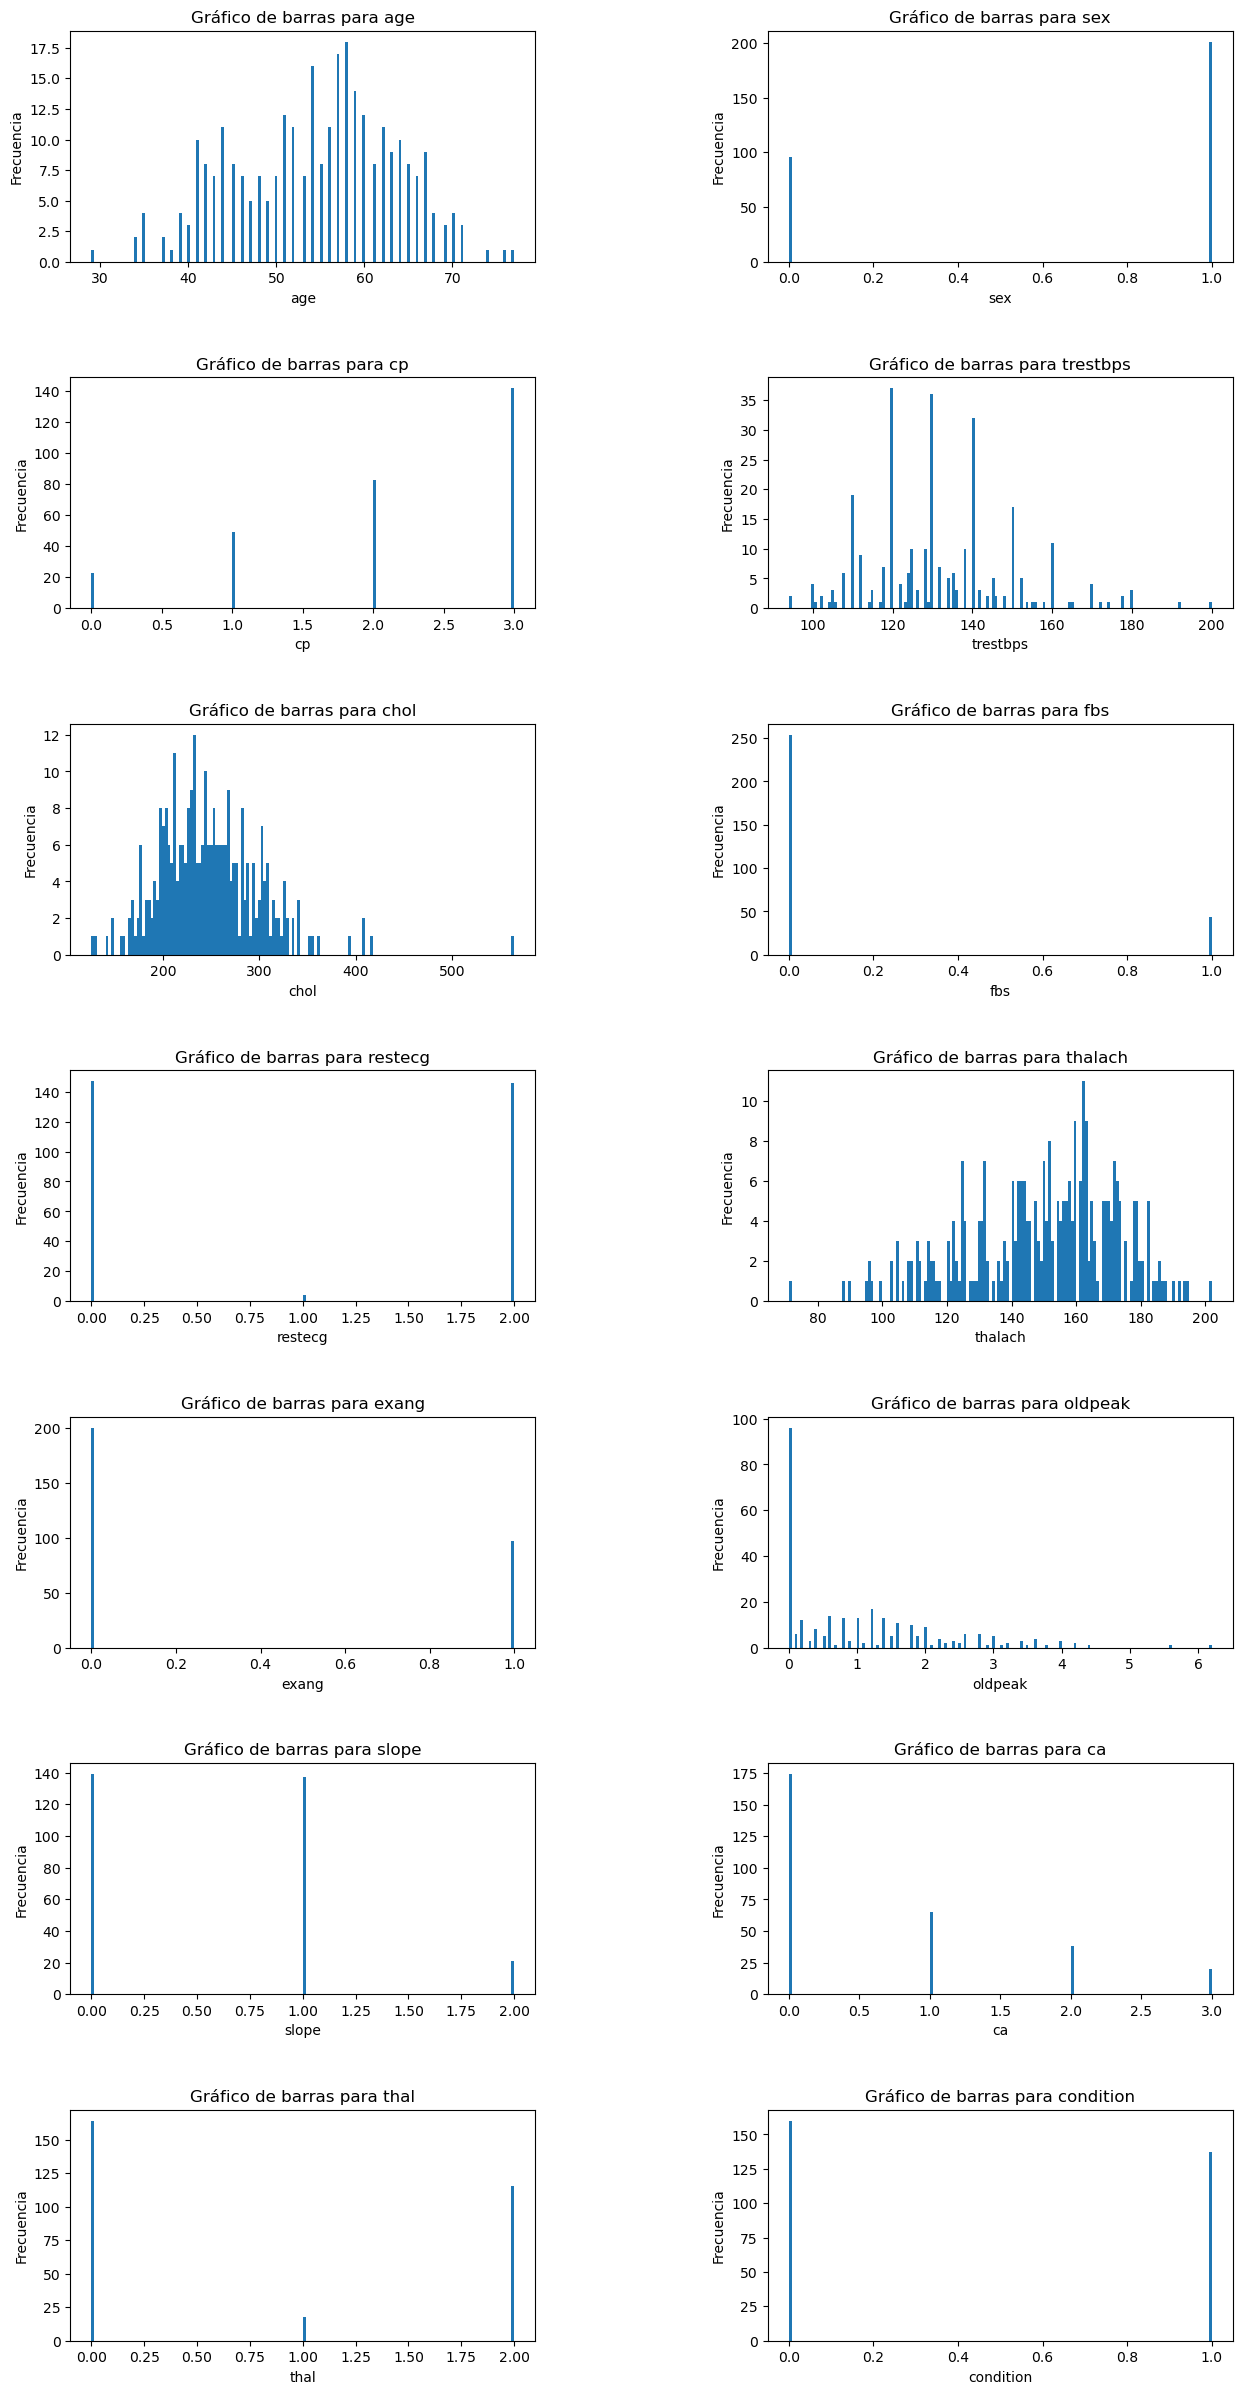

In [14]:
#Graficamos las variables numericas en graficos de histogramas
n_filas = 7
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(15, 30)) #Dentro de la misma figura creamos 14 graficas

plt.subplots_adjust(wspace=0.5, hspace=0.5)

columnas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition' ]

for i, columna in enumerate(columnas):
    # Calcular la posición del subplot
    fila = i // n_columnas
    col = i % n_columnas
    
    # Verificar si el índice está dentro del rango del número de columnas
    if i < len(columnas):
        
        # Crear el gráfico de histograma en el subplot correspondiente
        axs[fila, col].hist(df_proc[columna], bins=150)
        
        # Añadir títulos y etiquetas
        axs[fila, col].set_title(f'Gráfico de barras para {columna}')
        axs[fila, col].set_xlabel(columna)
        axs[fila, col].set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

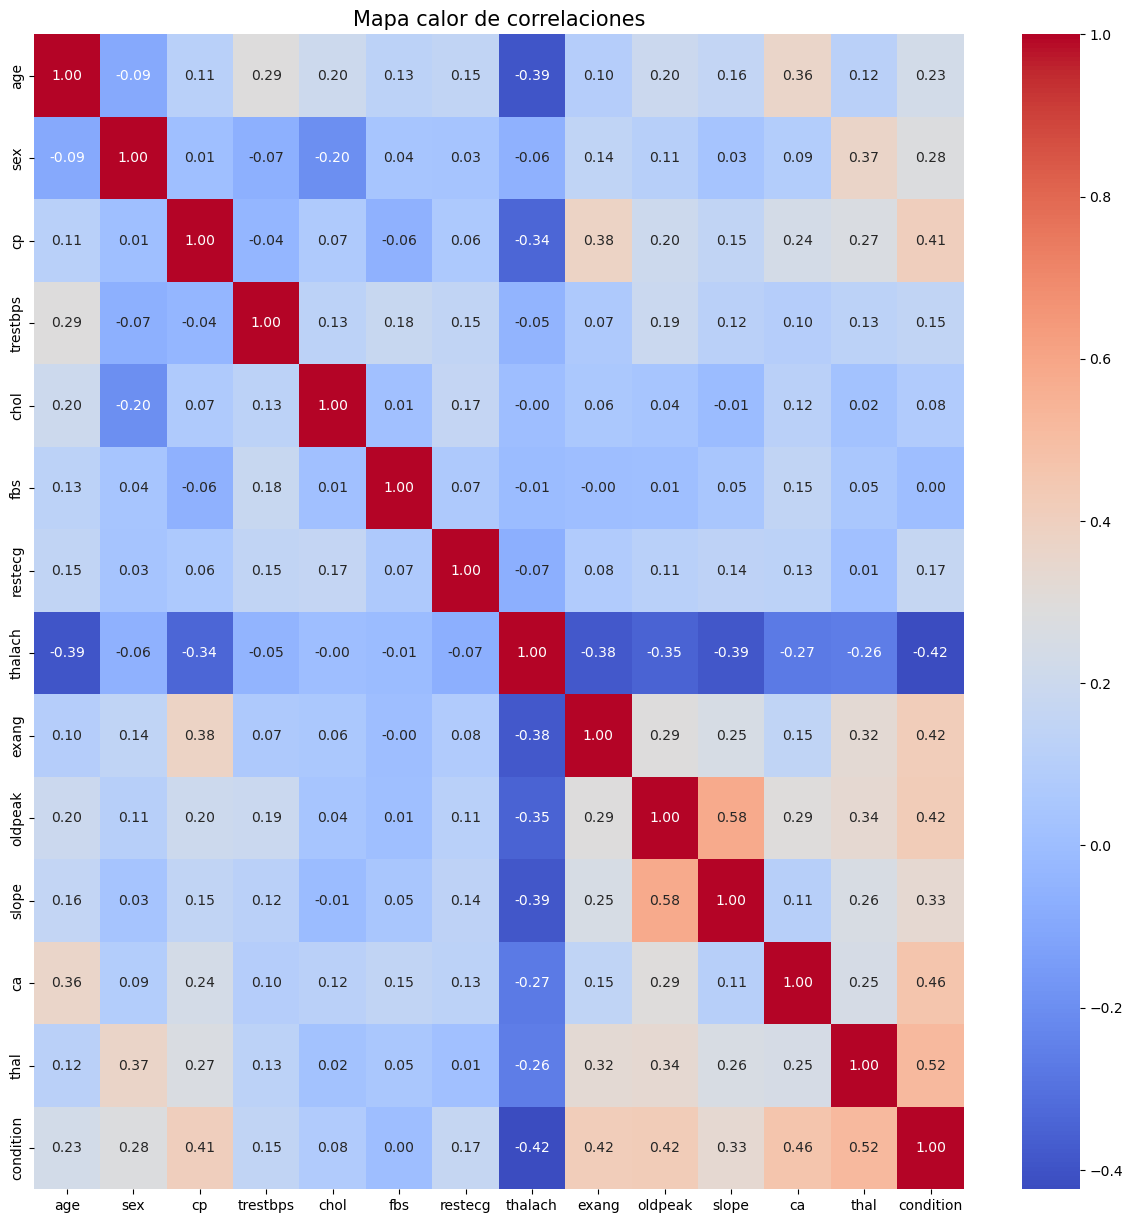

In [19]:
#Matriz de correlación
plt.figure(figsize = (15,15))
heatmap = sns.heatmap(df_proc.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
#Corr es el metodo de correlación entre variables
#annot permite visualizar anotaciones; Cmap permite darle color al mapa; fmt es la cantidad de decimales
plt.title('Mapa calor de correlaciones', fontsize = 15)
plt.show()

# Modelos de predicción

In [20]:
from sklearn.model_selection import train_test_split
#Divide las bases en datos de entrenamiento (aprender) y datos de prueba (pronosticar)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#Los anteriores son modelos diferentes de machine learning (modelos de clasificación)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
#Metricas de evaluación para saber cual de los 4 modelos funciona mejor

In [21]:
#Creamos una funcion para presentar los modelos y su evaluacion con las diferentes metricas
def crea_modelos():
    global df_proc, resultados
    y = df_proc['condition']
    x = df_proc.drop(columns='condition')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)
    
    #Diccionario de modelos
    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }
    
    #Diccionario de resultados para modelos de regresión
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)

        #Metricas
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

In [22]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
    print(model)
    print(resultados['Accuracy'][i])
    print(resultados['Precision'][i])
    print(resultados['Recall'][i])
    print(resultados['F1-score'][i])
    print(resultados['AUC-ROC'][i])
    print('\n')
#Para mostrar los resultados de cada modelo

Regresión Logística
0.8333333333333334
0.8571428571428571
0.75
0.7999999999999999
0.8965


Árbol de Decisión
0.7111111111111111
0.6521739130434783
0.75
0.6976744186046512
0.715


Random Forest
0.8222222222222222
0.8157894736842105
0.775
0.7948717948717949
0.88625


Naive Bayes
0.8222222222222222
0.7857142857142857
0.825
0.8048780487804876
0.8935




C:\Users\braya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Funcion que grafica los resultados de cada metrica
def visualiza_resultados():
    global df_proc, resultados
    results_df = pd.DataFrame(resultados)
    #Transforma la lista de resultados en un DF
    results_df.set_index('Model', inplace=True)
    #Asignamos el indice al nombre del modelo

    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    #Se transpone el dataframe
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
    #Cada modelo lleva un color diferente

    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    plt.show()

C:\Users\braya\AppData\Local\Temp\ipykernel_21692\910305495.py:16: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
C:\Users\braya\AppData\Local\Temp\ipykernel_21692\910305495.py:16: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)


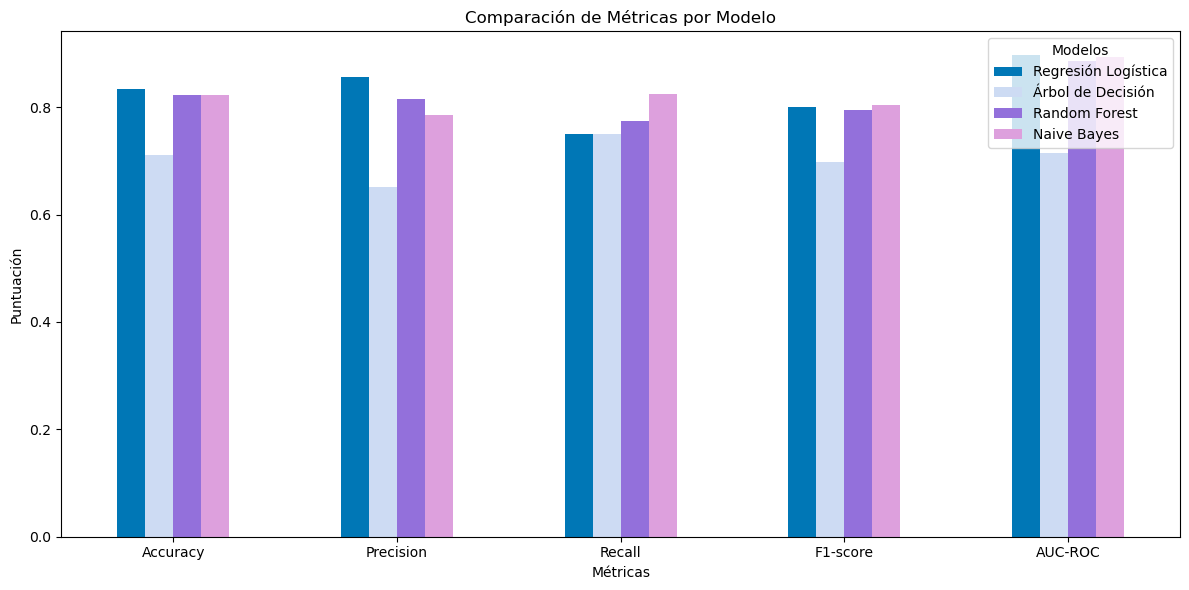

In [24]:
visualiza_resultados()
#Evaluamos cada modelo segun las metricas evaluadas